<h1>Water Jug Problem Using DFS</h1>

Here, We have two Jugs of Different Capacity. We can perfrom 4 operations with these Jugs i.e. Fill the jugs fully, Empty them to 0, Swap the content of one jug to another. Intially we assume the jugs to be (0,0). and the target is to get 4 in any of the jug. We are using DFS here to go to the target.

In [3]:
def water_jug_dfs(capacity1, capacity2, target):
    visited = set()  
    path = []

    def dfs(jug1, jug2):
        
        if (jug1, jug2) in visited:  
            return False
        visited.add((jug1, jug2))

        path.append((jug1, jug2))

        if jug1 == target or jug2 == target:
            return True

        # if (jug1,jug2) in target:
        #     return True

        if dfs(3, jug2):
            return True
        if dfs(jug1, 5):
            return True
            
        if dfs(0, jug2):
            return True
        if dfs(jug1, 0):
            return True
            
        if dfs(max(0, jug1 - (5 - jug2)), min(5, jug1 + jug2)):
            return True
        if dfs(min(3, jug1 + jug2), max(0, jug2 - (3 - jug1))):
            return True

        path.pop()
        return False

    dfs(0, 0)
    return path

In [5]:
capacity1 = 3  
capacity2 = 5  
target = 4

solution = water_jug_dfs(capacity1, capacity2, target)

if solution:
    print("Steps of Solution:")
    for i in solution:
        print(i)
else:
    print("No solution found for Given Input")

Steps of Solution:
(0, 0)
(3, 0)
(3, 5)
(0, 5)
(3, 2)
(0, 2)
(2, 0)
(2, 5)
(3, 4)


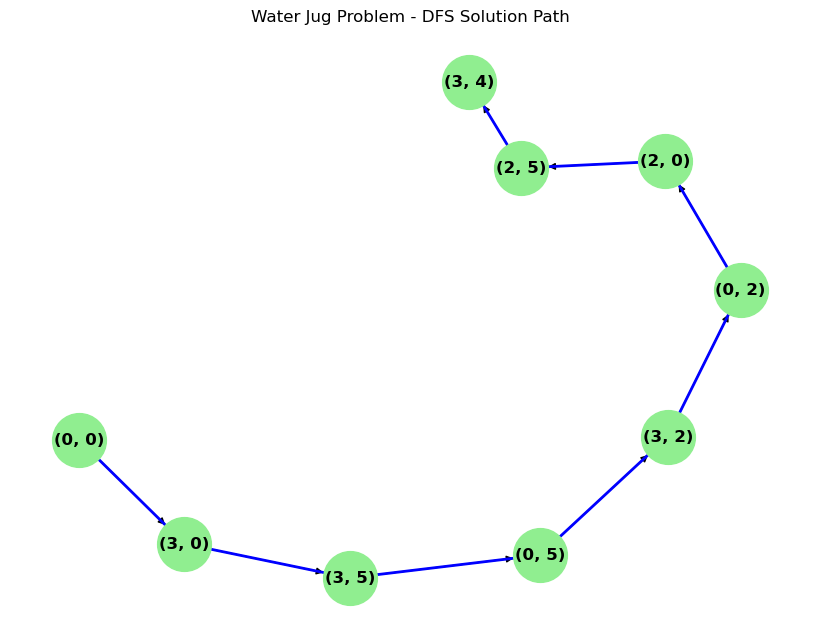

In [7]:
import matplotlib.pyplot as plt
import networkx as nx

def visualize_dfs_solution(solution):
    G = nx.DiGraph()

    for i in range(len(solution) - 1):
        G.add_edge(solution[i], solution[i + 1])

    pos = nx.spring_layout(G)  

    plt.figure(figsize=(8, 6))

    nx.draw(G, pos, with_labels=True, node_color='lightgreen', node_size=1500, font_size=12, font_weight='bold')
    nx.draw_networkx_edges(G, pos, edgelist=list(G.edges()), edge_color='blue', width=2)

    plt.title("Water Jug Problem - DFS Solution Path")
    plt.show()

if solution:
    visualize_dfs_solution(solution)